<a href="https://colab.research.google.com/github/Salma-21/Decision-Trees-and-KNN-for-Medication-Prediction/blob/main/Knn_%26_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
----------------------------------------

This is the Report of Experiment 1:

Experiment 1:
  - Training set size: 136
  - Testing set size: 59
  - Decision tree size: 11 nodes
  - Decision tree accuracy: 0.9830508474576272

Experiment 2:
  - Training set size: 136
  - Testing set size: 59
  - Decision tree size: 11 nodes
  - Decision tree accuracy: 1.0

Experiment 3:
  - Training set size: 136
  - Testing set size: 59
  - Decision tree size: 11 nodes
  - Decision tree accuracy: 1.0

Experiment 4:
  - Training set size: 136
  - Testing set size: 59
  - Decision tree size: 11 nodes
  - Decision tree accuracy: 1.0

Experiment 5:
  - Training set size: 136
  - Testing set size: 59
  - Decision tree size: 11 nodes
  - Decision tree accuracy: 0.9830508474576272

T

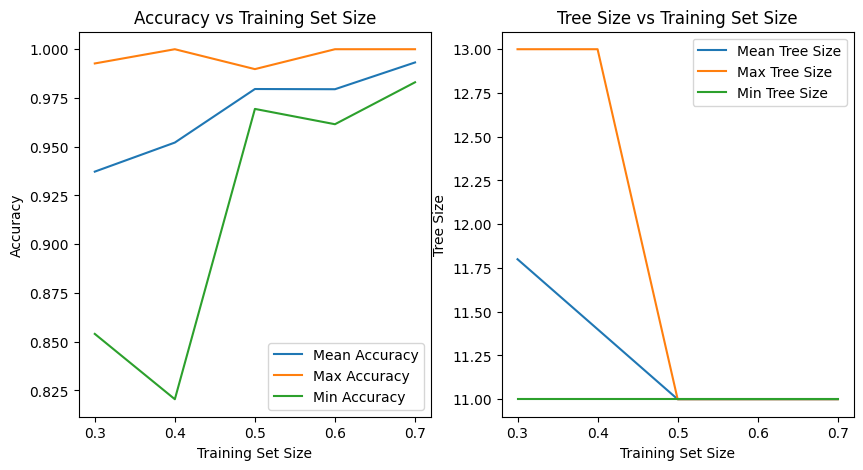

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

KNN=2:
Accuracy:68.40%
number of correct classified:158
num of all instance:"231

KNN=3:
Accuracy:73.59%
number of correct classified:170
num of all instance:"231

KNN=4:
Accuracy:74.03%
number of correct classified:171
num of all instance:"231

KNN=5:
Accuracy:75.76%
number of correct classified:175
num of all instance:"231

KNN=6:
Accuracy:76.62%
number of correct classified:177
num of all instance:"231

avarage of all accuracy=73.68%


In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from collections import Counter
from scipy.spatial import distance

#################################### Decision Tree ############################################

drug_data = pd.read_csv('/content/drive/MyDrive/Databases/drug.csv')

# i) check whether there are missing values

missing_values = drug_data.isnull().sum()
print(missing_values)

# 1-missing values
drug_data.dropna(inplace=True)
print(drug_data.isnull().sum())

# 2-features and target seprated
x = drug_data.iloc[:, :-1].values
y = drug_data.iloc[:, -1].values

# print("before Encoded x[:, 2]:", x[:, 2])

# 4-encode categorical
encoder = LabelEncoder()
x[:, 1] = np.array(encoder.fit_transform(x[:, 1]))
x[:, 2] = np.array(encoder.fit_transform(x[:, 2]))
x[:, 3] = np.array(encoder.fit_transform(x[:, 3]))
y = np.array(encoder.fit_transform(y))



# Verify the encoding
# print(" after Encoded x[:, 2]:", x[:, 2])

# Experiment 1: Training and Testing with Fixed Train-Test Split Ratio
# Set up lists to store results
tree_sizes = []
accuracies = []

# Create a report
print("----------------------------------------\n")
print("This is the Report of Experiment 1:\n")
# Perform the experiment five times
for i in range(5):
    # Split the data into training and testing sets with a fixed ratio and diffrent random state
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)

    # Train the decision tree model
    DecisionTree = DecisionTreeClassifier(random_state=50)
    DecisionTree.fit(x_train, y_train)

    # Predict on the test set
    y_pred = DecisionTree.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    tree_sizes.append(DecisionTree.tree_.node_count)
    accuracies.append(accuracy)

    # Print the results for each experiment
    print(f"Experiment {i + 1}:")
    print(f"  - Training set size: {len(x_train)}")
    print(f"  - Testing set size: {len(x_test)}")
    print(f"  - Decision tree size: {DecisionTree.tree_.node_count} nodes")
    print(f"  - Decision tree accuracy: {accuracy}\n")

# Compare the results and select the best model
best_model_index = accuracies.index(max(accuracies))
print(
    f"The best model is from Experiment {best_model_index + 1} with an accuracy of {accuracies[best_model_index]} and {tree_sizes[best_model_index]} nodes.")

#Experiment2: Training and Testingwith a Range of Train-Test Split Ratios
TrainingSizes = np.arange(0.3, 0.8, 0.1)
results = {'train_size': [], 'mean_accuracy': [], 'max_accuracy': [], 'min_accuracy': [],
           'mean_tree_size': [], 'max_tree_size': [], 'min_tree_size': []}
g = 0

# Create a report
print("----------------------------------------\n")
print("This is the Report of Experiment 2:\n")

for size in TrainingSizes:
    accuracies = []
    tree_sizes = []
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1 - size, random_state=i)
        # Train the model of decision tree
        DTModel = DecisionTreeClassifier()
        DTModel.fit(X_train, y_train)
        # Make on the test set predictions
        y_pred = DTModel.predict(X_test)
        # Get the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        # Get the size of the tree
        tree_size = DTModel.tree_.node_count
        tree_sizes.append(tree_size)

    # Store results
    results['train_size'].append(size)
    results['mean_accuracy'].append(np.mean(accuracies))
    results['max_accuracy'].append(np.max(accuracies))
    results['min_accuracy'].append(np.min(accuracies))
    results['mean_tree_size'].append(np.mean(tree_sizes))
    results['max_tree_size'].append(np.max(tree_sizes))
    results['min_tree_size'].append(np.min(tree_sizes))
    g = g + 1

    # show report of each iteration
    print(f"Experiment {g}:")
    print(f"  - training set size: {size}")
    print(f"  - mean accuracy: {np.mean(accuracies)}")
    print(f"  - maximum accuracy: {np.max(accuracies)}")
    print(f"  - minimum accuracy: {np.min(accuracies)}")
    print(f"  - mean tree size: {np.mean(tree_sizes)}")
    print(f"  - maximum tree size: {np.max(tree_sizes)}")
    print(f"  - minimum tree size: {np.min(tree_sizes)}\n")

print("----------------------------------------\n")
print("These are the plots needed:-\n")

# Determine the plots sizes
plt.figure(figsize=(10, 5))

# Accuracy vs Training Set Size plot
plt.subplot(1, 2, 1)
plt.plot(results['train_size'], results['mean_accuracy'], label='Mean Accuracy')
plt.plot(results['train_size'], results['max_accuracy'], label='Max Accuracy')
plt.plot(results['train_size'], results['min_accuracy'], label='Min Accuracy')
plt.title('Accuracy vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

# Tree Size vs Training Set Size plot
plt.subplot(1, 2, 2)
plt.plot(results['train_size'], results['mean_tree_size'], label='Mean Tree Size')
plt.plot(results['train_size'], results['max_tree_size'], label='Max Tree Size')
plt.plot(results['train_size'], results['min_tree_size'], label='Min Tree Size')
plt.title('Tree Size vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Tree Size')
plt.legend()

plt.show()


#################################### KNN ############################################

Data_Frame = pd.read_csv('/content/drive/MyDrive/Databases/diabetes.csv')

# missing values
Data_Frame.dropna(inplace=True)
print(Data_Frame.isnull().sum())

# features and target seprated
x = Data_Frame.iloc[:, :-1].values
y = Data_Frame.iloc[:, -1].values

# shuffle & split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# min and max
x_train_Minimum = x_train.min(axis=0)
x_train_Maximum = x_train.max(axis=0)

_range = x_train_Maximum - x_train_Minimum
NEW_x_train = (x_train - x_train_Minimum) / _range
NEW_x_test = (x_test - x_train_Minimum) / _range


# min max (2)
# scaler = MinMaxScaler()
# NEW_x_train= scaler.fit_transform(x_train)
# NEW_x_test = scaler.transform(x_test)

def len(sequence):
    count = 0
    for _ in sequence:
        count += 1
    return count

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))


# knn Classifier
class KNearestNeighbors:
    def __init__(self, num_neighbors=3):
        self.num_neighbors = num_neighbors
    def fit(self, training_data, training_labels):
        self.training_data = training_data
        self.training_labels = training_labels
    def predict(self, test_data):
        predicted_labels = []
        for test_point in test_data:
            distance_to_training_points = []
            for training_point in self.training_data:
                distance_to_training_points.append(euclidean_distance(test_point, training_point))

            nearest_neighbors_indices = np.argsort(distance_to_training_points)[:self.num_neighbors]
            nearest_neighbors_labels = []
            for index in nearest_neighbors_indices:
                nearest_neighbors_labels.append(self.training_labels[index])
            most_common_labels = Counter(nearest_neighbors_labels).most_common()
            if len(most_common_labels) > 1 and most_common_labels[0][1] == most_common_labels[1][1]:
                weighted_votes = Counter()
                for i in range(self.num_neighbors):
                    distance = distance_to_training_points[nearest_neighbors_indices[i]]
                    weight = 1 / distance
                    label = nearest_neighbors_labels[i]
                    weighted_votes[label] += weight
                predicted_labels.append(weighted_votes.most_common(1)[0][0])
            else:
                predicted_labels.append(most_common_labels[0][0])
        return predicted_labels

avg_accuracy = 0
for i in range(2, 7):
    KNN_OBJ = KNearestNeighbors(i)
    KNN_OBJ.fit(NEW_x_train, y_train)
    y_Predect = KNN_OBJ.predict(NEW_x_test)
    accuracy = np.sum(y_Predect == y_test) / len(y_test)
    avg_accuracy += accuracy
    print(f'\nKNN={i}:')
    print(f'Accuracy:{accuracy * 100:.2f}%')
    print(f'number of correct classified:{np.sum(y_Predect == y_test)}')
    print(f'num of all instance:"{len(y_test)}')

avg_accuracy /= 5
print(f'\navarage of all accuracy={avg_accuracy * 100:.2f}%')